# Bumble Dating App - Google Play Store Review

This dataset belongs to the Bumble app available on the Google Play Store. The Dataset mostly has user reviews and the various comments made by the users

In [4]:
# Imports
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Custom functions
os.chdir("..")
import utils.text_utils as tu

In [5]:
# Load data
data = pd.read_csv("./data/raw/bumble_google_play_reviews.csv")
data.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGCWX1s8NNKNYQ5uMKTqiOTl1wci0EXqB1YMF4...,Javed Sahiad,https://play-lh.googleusercontent.com/a-/AOh14...,Bumble rocks 👍🤞,5,0,5.253.0,2022-03-28 23:33:04,NaN,NaN
1,gp:AOqpTOFmBlHJLKFu87RU2d-AKSXiIzUd_utDNWBKhsw...,Justin Miller,https://play-lh.googleusercontent.com/a-/AOh14...,Just a cash grab. Congrats you have 2 new like...,1,0,5.262.0,2022-03-28 23:23:30,NaN,NaN
2,gp:AOqpTOHAcFeMyfgGN_6k7HRCTRwYS2q1mKCA_t5YIkf...,Adam Poots,https://play-lh.googleusercontent.com/a/AATXAJ...,"Terrible, l have lost total faith in this app,...",1,15,5.260.0,2022-03-28 23:10:12,Uh oh! We'll need some more account informatio...,2022-02-23 12:33:01


In [6]:
# Format columns
data['at'] = pd.to_datetime(data['at'] )
data['score'] = pd.to_numeric(data['score'] )

In [7]:
# Filter by date
data = data[data['at']>'2016-01-01']

Describe data

In [ ]:
unique_users = len(data['userName'].unique())
start_date = data['at'].min()
end_date = data['at'].max()
avg_rating = data['score'].mean()

print(f"Total comments: {data.shape[0]:d}")
print(f"Unique users: {unique_users:d}")
print(f"Period of analysis: {start_date} to {end_date}")
print(f"Average rating: {avg_rating:2f}")

Total comments: 105268
Unique users: 95130
Period of analysis: 2016-01-01 01:51:57 to 2022-03-28 23:33:04
Average rating: 2.830556


Preprocess data

In [12]:
columns = ['at', 'score', 'content']
clean_data = data.loc[:,columns].copy()

In [13]:
# Clean text
clean_data['clean_content'] = list(map(lambda x: tu.clean_text(str(x), lemmatize=True), clean_data['content']))

In [16]:
# Compute sentiment (Sentiment Analysis MVP)
opinion_dict = pd.read_csv("./data/preprocessed/opinion_dict.csv")
clean_data['sentiment'] = list(map(lambda x: tu.get_sentiment(x, opinion_dict), clean_data['clean_content']))

In [17]:
clean_data.to_csv("./data/preprocessed/bumble_preprocessed.csv", index = False)
clean_data.head()

,at,score,content,clean_content,sentiment
0,2022-03-28 23:33:04,5,Bumble rocks 👍🤞,bumble rock,0.000
1,2022-03-28 23:23:30,1,Just a cash grab. Congrats you have 2 new like...,cash grab congrats new like let swipe right fi...,0.071
2,2022-03-28 23:10:12,1,"Terrible, l have lost total faith in this app,...",terrible lost total faith app promised contact...,-0.118
3,2022-03-28 22:28:33,5,Easy to use,easy use,0.500
4,2022-03-28 22:20:53,1,"Just alot of gimmicks, fake profile, and upsal...",alot gimmick fake profile upsales decide delet...,-0.167


Top words

In [18]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_data['clean_content'].values)

In [19]:
word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': X.toarray().sum(axis=0)})
word_counts.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)

In [20]:
word_counts.head(10)

,word,count
0,app,48139
1,match,17794
2,like,16652
3,people,14469
4,get,13375
5,good,13265
6,time,11420
7,bumble,10763
8,profile,10099
9,woman,9695


<AxesSubplot:title={'center':'Average Score'}, xlabel='at'>

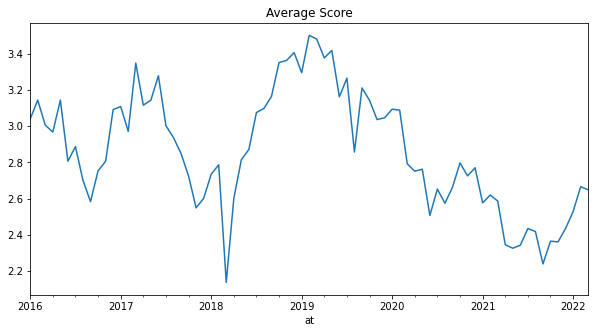

In [21]:
score_trend = clean_data.groupby(by=pd.Grouper(key="at", freq="M"))['score'].mean()
plt.figure(figsize=(10,5))
plt.title("Average Score")
score_trend.plot()

<AxesSubplot:title={'center':'# Comments'}, xlabel='at'>

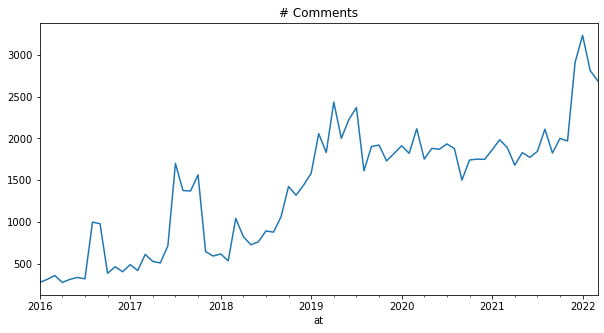

In [22]:
nComment_trend = clean_data.groupby(by=pd.Grouper(key="at", freq="M"))['content'].count()
plt.figure(figsize=(10,5))
plt.title("# Comments")
nComment_trend.plot()